In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2
from tensorflow import keras
from keras import layers

2024-04-06 22:50:20.429732: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-06 22:50:20.577476: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-06 22:50:20.582235: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-04-06 22:50:20.582251: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [2]:
def load_data(file):
    df = pd.read_csv(file)
    df.drop(columns="Unnamed: 0", inplace= True)
    df = df.set_index("Date")
    return df

def plot_val(model,Nsample, xv, yv):
    val_predictions = model.predict(xv).flatten()
    val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':yv})
    plt.plot(val_results['Val Predictions'][:Nsample])
    plt.plot(val_results['Actuals'][:Nsample])
    plt.title("Validation")
    plt.show()
    return val_results
    
def plot_test(model, Nsample, xtt, ytt):
    test_predictions = model.predict(xtt).flatten()
    test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':ytt})
    plt.plot(test_results['Test Predictions'][:Nsample])
    plt.plot(test_results['Actuals'][:Nsample])
    plt.title("Test")
    plt.show()
    return test_results
    
def plot_predictions1(model, X, y, start=0, end=100):
    prediction = model.predict(X).flatten()
    df = pd.DataFrame(data={'Predictions':prediction, 'Actuals':y})
    plt.plot(df['Predictions'][start:end])
    plt.plot(df['Actuals'][start:end])
    plt.title("Predictions")
    plt.show()
    return df
    
def load_data_model(epochs):
    x_train = np.load(f"epochs{epochs}/x_train.npy")
    y_train = np.load(f"epochs{epochs}/y_train.npy")
    x_test  = np.load(f"epochs{epochs}/x_test.npy")
    y_test  = np.load(f"epochs{epochs}/y_test.npy")
    x_val   = np.load(f"epochs{epochs}/x_val.npy")
    y_val   = np.load(f"epochs{epochs}/y_val.npy")
    
    return x_train, y_train, x_test, y_test, x_val, y_val

In [3]:
epochs = 50
x_train, y_train, x_test, y_test, x_val, y_val = load_data_model(epochs)

In [4]:
metricsdf = pd.read_csv(f"epochs{epochs}/metricsT.csv", index_col= False)

# DO

## Overall

In [344]:
metricsdf = pd.read_csv(f"../DOmetrics.csv", index_col= False)
metricsdf.drop(columns="index", inplace= True)

In [345]:
metricsdf.head(), metricsdf.tail()

(  Location Metrics Model Category Model         y
 0       S1     MSE        General   CNN  3.317144
 1       S1     MSE        General   RNN  1.294700
 2       S1     MSE        General   GRU  0.843617
 3       S1     MSE        General  LSTM  0.841499
 4       S1     MSE             MA   CNN  2.270824,
     Location Metrics Model Category         Model         y
 443       S4      R2          MA HY  LSTM RNN GRU  0.899399
 444       S4      R2          MA HY   CNN RNN GRU -0.056895
 445       S4      R2          MA HY       CNN GRU -0.052094
 446       S4      R2          MA HY       RNN GRU  0.850191
 447       S4      R2          MA HY      RNN LSTM  0.875270)

In [346]:
rmse = metricsdf[metricsdf['Metrics'].str.contains('RMSE')]
rmse.describe()

,y
count,112.000000
mean,0.693484
std,0.553636
min,0.116219
25%,0.258259
50%,0.521951
75%,0.940793
max,3.352998


In [347]:
rmse = metricsdf[metricsdf['Metrics'].str.contains('RMSE')]
mse = metricsdf[metricsdf['Metrics'].str.contains('MSE')]
mae = metricsdf[metricsdf['Metrics'].str.contains('MAE')]
r2 = metricsdf[metricsdf['Metrics'].str.contains('R2')]

             Location Metrics Model Category         y
Model                                                 
CNN                S1    RMSE           DReg  0.966146
CNN GRU            S1    RMSE             HY  0.931312
CNN LSTM           S1    RMSE             HY  0.939227
CNN RNN GRU        S1    RMSE             HY  0.912119
GRU                S1    RMSE           DReg  0.125617
LSTM               S1    RMSE           DReg  0.123318
LSTM RNN GRU       S1    RMSE             HY  0.117241
RNN                S1    RMSE           DReg  0.120438
RNN GRU            S1    RMSE             HY  0.116219
RNN LSTM           S1    RMSE             HY  0.124848


<AxesSubplot:xlabel='Model'>

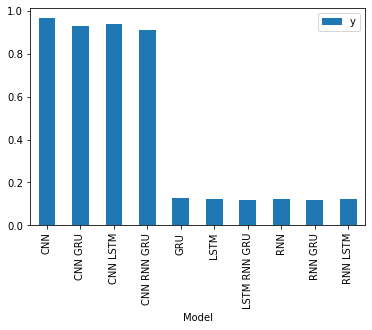

In [348]:
print(rmse.groupby(["Model"]).min())
rmse.groupby(["Model"]).min().plot(kind= "bar")

### RNN GRU 0.116

In [349]:
epochs = 50
x_train, y_train, x_test, y_test, x_val, y_val = load_data_model(epochs)

3/3 [==============================] - 0s 6ms/step


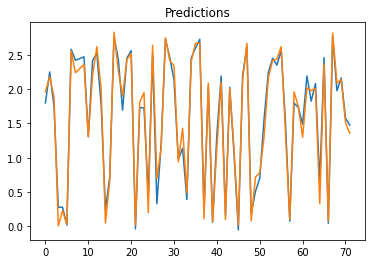

In [350]:
model = load_model(f"epochs{epochs}/hybrid_rnn_gru/")
rnn_gru = plot_predictions1(model, x_test, y_test)

### LSTM RNN GRU 0.117

3/3 [==============================] - 1s 9ms/step


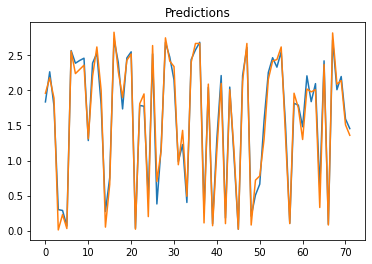

In [351]:
model = load_model(f"epochs{epochs}/hybrid_lstm_rnn_gru/")
lstm_rnn_gru = plot_predictions1(model, x_test, y_test)

### RNN 0.120

3/3 [==============================] - 0s 3ms/step


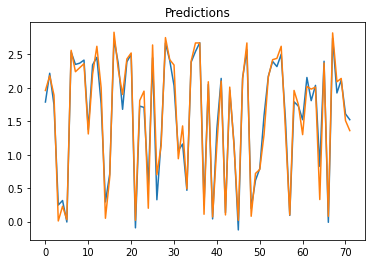

In [352]:
model = load_model(f"epochs{epochs}/auto_rnn/")
auto_rnn = plot_predictions1(model, x_test, y_test)

### LSTM 0.123

3/3 [==============================] - 0s 5ms/step


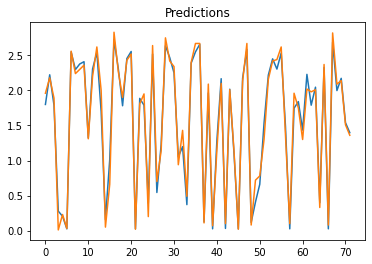

In [353]:
model = load_model(f"epochs{epochs}/auto_lstm/")
auto_lstm = plot_predictions1(model, x_test, y_test)

In [354]:
rnn_gru

,Predictions,Actuals
0,1.800019,1.96
1,2.250572,2.18
2,1.751291,1.89
3,0.278878,0.01
4,0.279411,0.23
...,...,...
67,2.770207,2.82
68,1.977332,2.09
69,2.164281,2.14
70,1.577340,1.51


In [355]:
df = pd.DataFrame()
df["RNN GRU P"] = rnn_gru["Predictions"]
df["LSTM RNN GRU P"] = lstm_rnn_gru["Predictions"]
df["DReg RNN P"] = auto_rnn["Predictions"]
df["DReg LSTM P"] = auto_lstm["Predictions"]
df["Actuals"] = y_test

<AxesSubplot:>

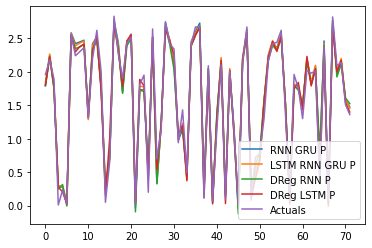

In [356]:
df.plot()

In [357]:
df.to_csv("../prediction/DOoverall.csv", index= False)

## Moving Average

In [358]:
mvgdf = metricsdf[metricsdf['Model Category'].str.contains('MA')]
mvgdf = mvgdf[mvgdf['Metrics'].str.contains('RMSE')]

             Location Metrics Model Category         y
Model                                                 
CNN                S1    RMSE             MA  1.279798
CNN GRU            S1    RMSE          MA HY  0.938352
CNN LSTM           S1    RMSE          MA HY  0.939227
CNN RNN GRU        S1    RMSE          MA HY  0.912119
GRU                S1    RMSE             MA  0.282993
LSTM               S1    RMSE             MA  0.362407
LSTM RNN GRU       S1    RMSE          MA HY  0.290162
RNN                S1    RMSE             MA  0.194770
RNN GRU            S1    RMSE          MA HY  0.178071
RNN LSTM           S1    RMSE          MA HY  0.266139


<AxesSubplot:xlabel='Model'>

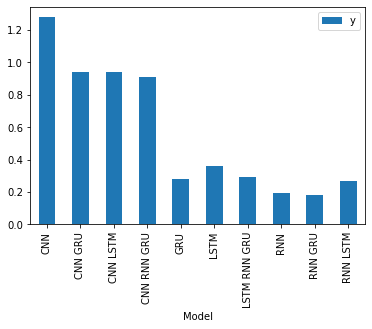

In [359]:
print(mvgdf.groupby(["Model"]).min())
mvgdf.groupby(["Model"]).min().plot(kind= "bar")

### RNN GRU 0.178

In [360]:
epochs = 50
x_train, y_train, x_test, y_test, x_val, y_val = load_data_model(epochs)

3/3 [==============================] - 0s 6ms/step


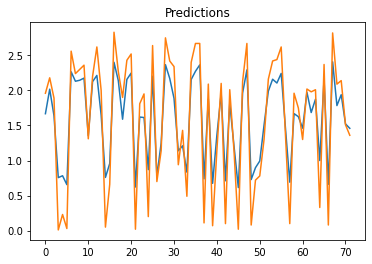

In [361]:
model = load_model(f"epochs{epochs}/mavg_hybrid_rnn_gru/")
rnn_gru = plot_predictions1(model, x_test, y_test)

### LSTM RNN GRU 0.2901

3/3 [==============================] - 2s 12ms/step


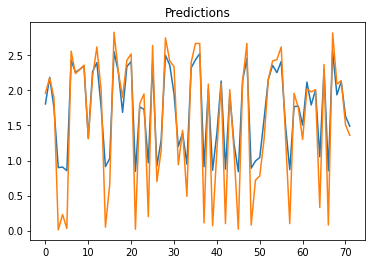

In [362]:
model = load_model(f"epochs{epochs}/mavg_hybrid_lstm_rnn_gru/")
lstm_rnn_gru = plot_predictions1(model, x_test, y_test)

### RNN 0.198

3/3 [==============================] - 0s 3ms/step


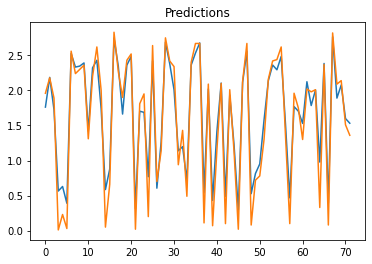

In [363]:
model = load_model(f"epochs{epochs}/mavg_rnn/")
rnn = plot_predictions1(model, x_test, y_test)

### RNN LSTM 0.26

3/3 [==============================] - 0s 5ms/step


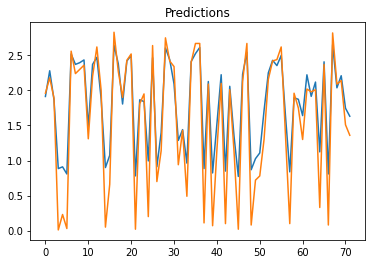

In [364]:
model = load_model(f"epochs{epochs}/mavg_hybrid_rnn_lstm/")
rnn_lstm = plot_predictions1(model, x_test, y_test)

In [365]:
df = pd.DataFrame()
df["MA HY RNN GRU"] = rnn_gru["Predictions"]
df["MA HY LSTM RNN GRU"] = lstm_rnn_gru["Predictions"]
df["MA HY RNN LSTM"] = rnn_lstm["Predictions"]
df["MA RNN"] = rnn["Predictions"]
df["Actuals"] = y_test

<AxesSubplot:>

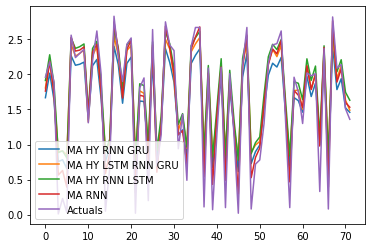

In [366]:
df.plot()

In [367]:
df.to_csv("../prediction/DOmavg.csv", index= False)

## DReg 

In [368]:
mvgdf = metricsdf[metricsdf['Model Category'].str.contains('DReg')]
mvgdf = mvgdf[mvgdf['Metrics'].str.contains('RMSE')]

In [369]:
mvgdf.head()

,Location,Metrics,Model Category,Model,y
120,S1,RMSE,DReg,CNN,0.966146
121,S1,RMSE,DReg,RNN,0.153406
122,S1,RMSE,DReg,GRU,0.143455
123,S1,RMSE,DReg,LSTM,0.123318
124,S1,RMSE,MA DReg,CNN,1.431832


      Location Metrics Model Category         y
Model                                          
CNN         S1    RMSE           DReg  0.966146
GRU         S1    RMSE           DReg  0.125617
LSTM        S1    RMSE           DReg  0.123318
RNN         S1    RMSE           DReg  0.120438


<AxesSubplot:xlabel='Model'>

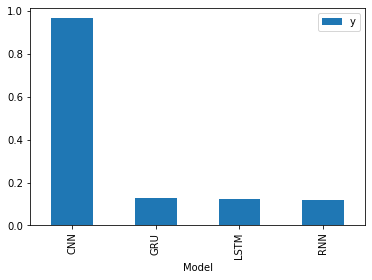

In [370]:
print(mvgdf.groupby(["Model"]).min())
mvgdf.groupby(["Model"]).min().plot(kind= "bar")

### RNN 0.120

3/3 [==============================] - 0s 4ms/step


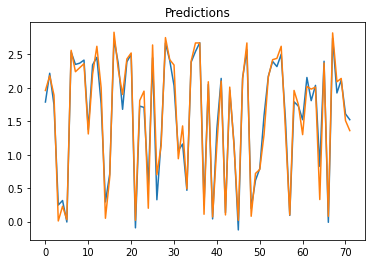

In [371]:
model = load_model(f"epochs{epochs}/auto_rnn/")
rnn = plot_predictions1(model, x_test, y_test)

### LSTM 0.123

3/3 [==============================] - 0s 4ms/step


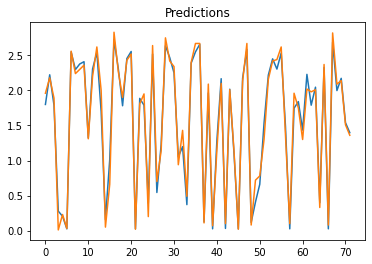

In [372]:
model = load_model(f"epochs{epochs}/auto_lstm/")
lstm = plot_predictions1(model, x_test, y_test)

### GRU 0.125

3/3 [==============================] - 0s 5ms/step


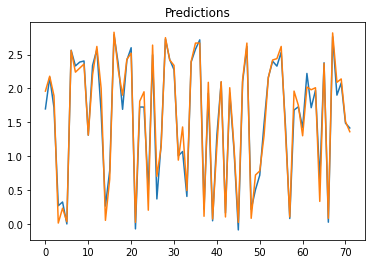

In [373]:
model = load_model(f"epochs{epochs}/auto_gru/")
gru = plot_predictions1(model, x_test, y_test)

In [374]:
df = pd.DataFrame()
df["DReg RNN"] = rnn["Predictions"]
df["Dreg LSTM"] = lstm["Predictions"]
df["Dreg GRU"] = gru["Predictions"]
df["Actuals"] = y_test

<AxesSubplot:>

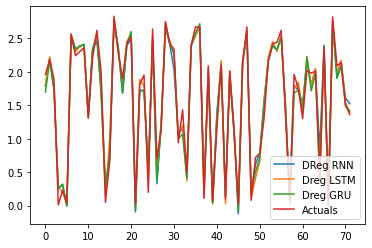

In [375]:
df.plot()

In [376]:
df.to_csv("../prediction/DOdreg.csv", index= False)

## MA DReg 

In [377]:
mvgdf = metricsdf[metricsdf['Model Category'].str.contains('DReg')]
mvgdf = mvgdf[mvgdf['Metrics'].str.contains('RMSE')]
mvgdf = mvgdf[mvgdf['Model Category'].str.contains('MA DReg')]

In [378]:
mvgdf.head()

,Location,Metrics,Model Category,Model,y
124,S1,RMSE,MA DReg,CNN,1.431832
125,S1,RMSE,MA DReg,RNN,0.339469
126,S1,RMSE,MA DReg,GRU,0.343457
127,S1,RMSE,MA DReg,LSTM,0.571545
152,S2,RMSE,MA DReg,CNN,1.456844


      Location Metrics Model Category         y
Model                                          
CNN         S1    RMSE        MA DReg  1.431832
GRU         S1    RMSE        MA DReg  0.343457
LSTM        S1    RMSE        MA DReg  0.362407
RNN         S1    RMSE        MA DReg  0.317840


<AxesSubplot:xlabel='Model'>

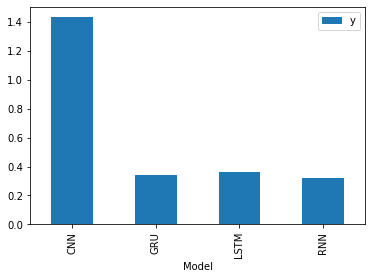

In [379]:
print(mvgdf.groupby(["Model"]).min())
mvgdf.groupby(["Model"]).min().plot(kind= "bar")

### RNN 0.317

3/3 [==============================] - 0s 3ms/step


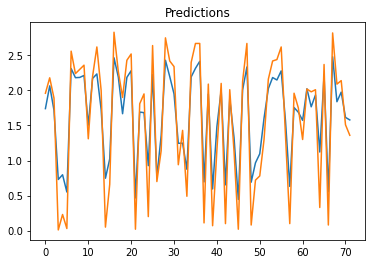

In [380]:
model = load_model(f"epochs{epochs}/mavg_auto_rnn/")
rnn = plot_predictions1(model, x_test, y_test)

### LSTM 0.362

3/3 [==============================] - 0s 4ms/step


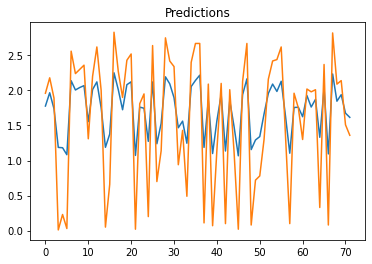

In [381]:
model = load_model(f"epochs{epochs}/mavg_auto_lstm/")
lstm = plot_predictions1(model, x_test, y_test)

### GRU 0.343

3/3 [==============================] - 0s 4ms/step


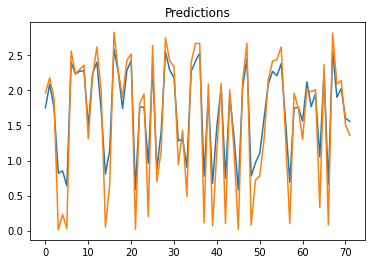

In [382]:
model = load_model(f"epochs{epochs}/mavg_auto_gru/")
gru = plot_predictions1(model, x_test, y_test)

In [383]:
df = pd.DataFrame()
df["MA DReg RNN"] = rnn["Predictions"]
df["MA Dreg LSTM"] = lstm["Predictions"]
df["MA Dreg GRU"] = gru["Predictions"]
df["Actuals"] = y_test

<AxesSubplot:>

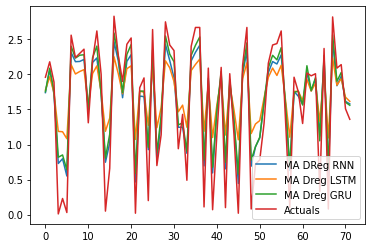

In [384]:
df.plot()

In [385]:
df.to_csv("../prediction/DOmadreg.csv", index= False)

In [439]:
ov = pd.read_csv("../prediction/DOoverall.csv", index_col= False)
mvg = pd.read_csv("../prediction/DOmavg.csv", index_col= False)
dreg = pd.read_csv("../prediction/DOdreg.csv", index_col= False)
mvgdreg = pd.read_csv("../prediction/DOmadreg.csv", index_col= False)

In [441]:
ov.columns = ['OV RNN GRU', 'OV LSTM RNN GRU', 'OV DReg RNN', ' OV DReg LSTM', 'Actuals']

In [442]:
mvgdreg.columns

Index(['MA DReg RNN', 'MA Dreg LSTM', 'MA Dreg GRU', 'Actuals'], dtype='object')

In [443]:
df = ov[['OV RNN GRU', 'OV LSTM RNN GRU', 'OV DReg RNN', ' OV DReg LSTM']]
df[['MA HY RNN GRU', 'MA HY LSTM RNN GRU', 'MA HY RNN LSTM', 'MA RNN']] = mvg[['MA HY RNN GRU', 'MA HY LSTM RNN GRU', 'MA HY RNN LSTM', 'MA RNN']]
df[['DReg RNN', 'Dreg LSTM', 'Dreg GRU']] = dreg[['DReg RNN', 'Dreg LSTM', 'Dreg GRU']]
df[['MA DReg RNN', 'MA Dreg LSTM', 'MA Dreg GRU', "Actuals"]] = mvgdreg[['MA DReg RNN', 'MA Dreg LSTM', 'MA Dreg GRU', "Actuals"]]
df.head()

,OV RNN GRU,OV LSTM RNN GRU,OV DReg RNN,OV DReg LSTM,MA HY RNN GRU,MA HY LSTM RNN GRU,MA HY RNN LSTM,MA RNN,DReg RNN,Dreg LSTM,Dreg GRU,MA DReg RNN,MA Dreg LSTM,MA Dreg GRU,Actuals
0,1.800019,1.836245,1.787278,1.799879,1.667819,1.806827,1.913598,1.761982,1.787278,1.799879,1.697073,1.740402,1.777036,1.753821,1.96
1,2.250572,2.265860,2.217100,2.223084,2.017676,2.187507,2.280387,2.186044,2.217100,2.223084,2.163390,2.064652,1.966896,2.089295,2.18
2,1.751291,1.778177,1.745394,1.788059,1.638591,1.748462,1.866290,1.725067,1.745394,1.788059,1.715645,1.716665,1.738759,1.756243,1.89
3,0.278878,0.299746,0.248198,0.277236,0.756264,0.898676,0.885130,0.564943,0.248198,0.277236,0.266354,0.729564,1.187107,0.819116,0.01
4,0.279411,0.287240,0.315275,0.205015,0.782674,0.906547,0.909843,0.629739,0.315275,0.205015,0.321420,0.797135,1.182398,0.851140,0.23


In [445]:
df.columns = ['OV RNN GRU', 'OV LSTM RNN GRU', 'OV DReg RNN', ' OV DReg LSTM',
       'MA HY RNN GRU', 'MA HY LSTM RNN GRU', 'MA HY RNN LSTM', 'MA RNN',
       'DReg RNN', 'DReg LSTM', 'DReg GRU', 'MA DReg RNN', 'MA DReg LSTM',
       'MA DReg GRU', 'Actuals']

In [446]:
df.to_csv("../prediction/DOBest.csv")

# BOD

## Overall

In [391]:
metricsdf = pd.read_csv(f"../BODmetrics.csv", index_col= False)
metricsdf.drop(columns="index", inplace= True)

In [392]:
metricsdf.head(), metricsdf.tail()

(  Location Metrics Model Category Model            y
 0       S1     MSE        General   CNN  1106.579711
 1       S1     MSE        General   RNN    44.883803
 2       S1     MSE        General   GRU   979.032439
 3       S1     MSE        General  LSTM   899.301748
 4       S1     MSE             MA   CNN    40.247997,
     Location Metrics Model Category         Model         y
 443       S4      R2          MA HY  LSTM RNN GRU -0.719704
 444       S4      R2          MA HY   CNN RNN GRU -0.044500
 445       S4      R2          MA HY       CNN GRU -7.545364
 446       S4      R2          MA HY       RNN GRU -7.351180
 447       S4      R2          MA HY      RNN LSTM -7.495128)

In [393]:
rmse = metricsdf[metricsdf['Metrics'].str.contains('RMSE')]
rmse.describe()

,y
count,112.000000
mean,11.109152
std,7.418413
min,1.045444
25%,6.695640
50%,7.801775
75%,14.964032
max,33.265293


In [394]:
rmse = metricsdf[metricsdf['Metrics'].str.contains('RMSE')]
mse = metricsdf[metricsdf['Metrics'].str.contains('MSE')]
mae = metricsdf[metricsdf['Metrics'].str.contains('MAE')]
r2 = metricsdf[metricsdf['Metrics'].str.contains('R2')]

             Location Metrics Model Category          y
Model                                                  
CNN                S1    RMSE           DReg   1.738702
CNN GRU            S1    RMSE             HY  14.689461
CNN LSTM           S1    RMSE             HY  13.578408
CNN RNN GRU        S1    RMSE             HY   5.275495
GRU                S1    RMSE           DReg   4.636855
LSTM               S1    RMSE           DReg   1.045444
LSTM RNN GRU       S1    RMSE             HY   6.776386
RNN                S1    RMSE           DReg   6.523546
RNN GRU            S1    RMSE             HY  14.321907
RNN LSTM           S1    RMSE             HY  14.220376


<AxesSubplot:xlabel='Model'>

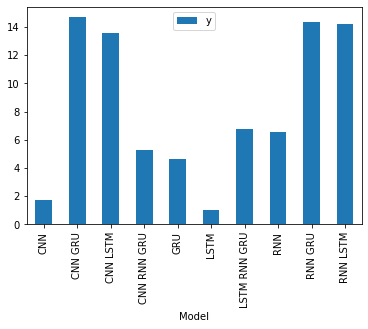

In [395]:
print(rmse.groupby(["Model"]).min())
rmse.groupby(["Model"]).min().plot(kind= "bar")

### RNN GRU 0.116

In [396]:
epochs = 50
x_train, y_train, x_test, y_test, x_val, y_val = load_data_model(epochs)

3/3 [==============================] - 0s 6ms/step


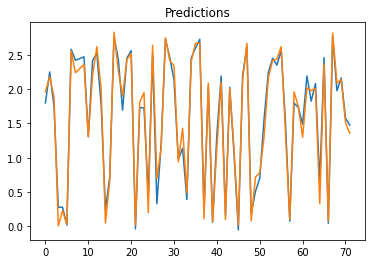

In [397]:
model = load_model(f"epochs{epochs}/hybrid_rnn_gru/")
rnn_gru = plot_predictions1(model, x_test, y_test)

### LSTM RNN GRU 0.117

3/3 [==============================] - 1s 9ms/step


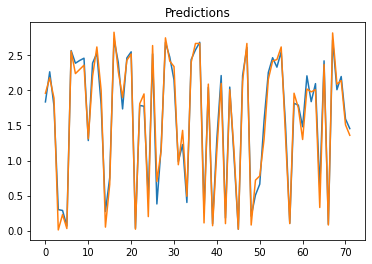

In [398]:
model = load_model(f"epochs{epochs}/hybrid_lstm_rnn_gru/")
lstm_rnn_gru = plot_predictions1(model, x_test, y_test)

### RNN 0.120

3/3 [==============================] - 0s 3ms/step


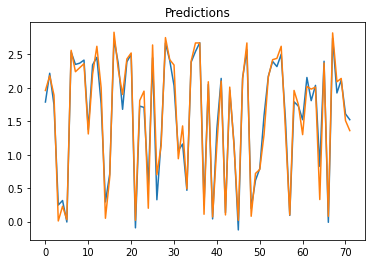

In [399]:
model = load_model(f"epochs{epochs}/auto_rnn/")
auto_rnn = plot_predictions1(model, x_test, y_test)

### LSTM 0.123

3/3 [==============================] - 0s 4ms/step


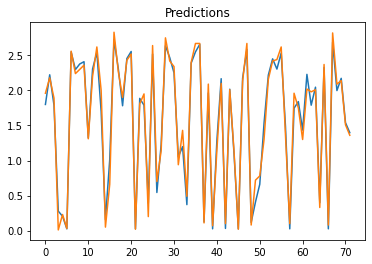

In [400]:
model = load_model(f"epochs{epochs}/auto_lstm/")
auto_lstm = plot_predictions1(model, x_test, y_test)

In [401]:
rnn_gru

,Predictions,Actuals
0,1.800019,1.96
1,2.250572,2.18
2,1.751291,1.89
3,0.278878,0.01
4,0.279411,0.23
...,...,...
67,2.770207,2.82
68,1.977332,2.09
69,2.164281,2.14
70,1.577340,1.51


In [402]:
df = pd.DataFrame()
df["RNN GRU P"] = rnn_gru["Predictions"]
df["LSTM RNN GRU P"] = lstm_rnn_gru["Predictions"]
df["DReg RNN P"] = auto_rnn["Predictions"]
df["DReg LSTM P"] = auto_lstm["Predictions"]
df["Actuals"] = y_test

<AxesSubplot:>

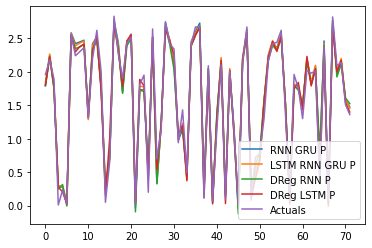

In [403]:
df.plot()

In [404]:
df.to_csv("../prediction/BODoverall.csv", index= False)

## Moving Average

In [405]:
mvgdf = metricsdf[metricsdf['Model Category'].str.contains('MA')]
mvgdf = mvgdf[mvgdf['Metrics'].str.contains('RMSE')]

             Location Metrics Model Category          y
Model                                                  
CNN                S1    RMSE             MA   4.797353
CNN GRU            S1    RMSE          MA HY  14.689461
CNN LSTM           S1    RMSE          MA HY  13.578408
CNN RNN GRU        S1    RMSE          MA HY   5.281112
GRU                S1    RMSE             MA   4.636855
LSTM               S1    RMSE             MA   2.715483
LSTM RNN GRU       S1    RMSE          MA HY   6.776386
RNN                S1    RMSE             MA   7.326058
RNN GRU            S1    RMSE          MA HY  14.618298
RNN LSTM           S1    RMSE          MA HY  14.834920


<AxesSubplot:xlabel='Model'>

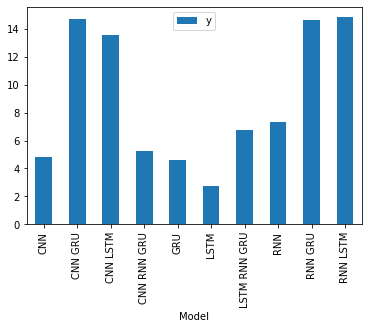

In [406]:
print(mvgdf.groupby(["Model"]).min())
mvgdf.groupby(["Model"]).min().plot(kind= "bar")

### RNN GRU 0.178

In [407]:
epochs = 50
x_train, y_train, x_test, y_test, x_val, y_val = load_data_model(epochs)

3/3 [==============================] - 0s 6ms/step


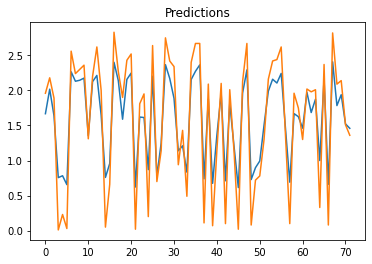

In [408]:
model = load_model(f"epochs{epochs}/mavg_hybrid_rnn_gru/")
rnn_gru = plot_predictions1(model, x_test, y_test)

### LSTM RNN GRU 0.2901

3/3 [==============================] - 1s 10ms/step


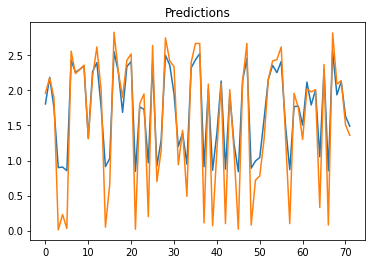

In [409]:
model = load_model(f"epochs{epochs}/mavg_hybrid_lstm_rnn_gru/")
lstm_rnn_gru = plot_predictions1(model, x_test, y_test)

### RNN 0.198

3/3 [==============================] - 0s 3ms/step


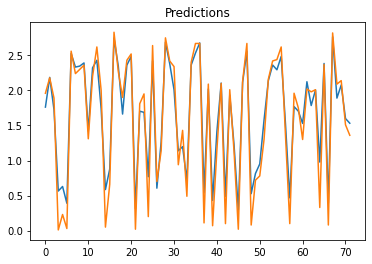

In [410]:
model = load_model(f"epochs{epochs}/mavg_rnn/")
rnn = plot_predictions1(model, x_test, y_test)

### RNN LSTM 0.26

3/3 [==============================] - 1s 6ms/step


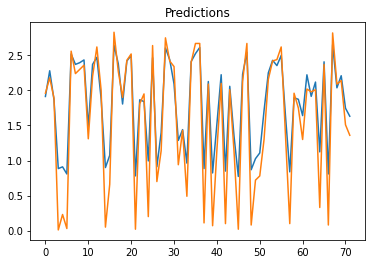

In [411]:
model = load_model(f"epochs{epochs}/mavg_hybrid_rnn_lstm/")
rnn_lstm = plot_predictions1(model, x_test, y_test)

In [412]:
df = pd.DataFrame()
df["MA HY RNN GRU"] = rnn_gru["Predictions"]
df["MA HY LSTM RNN GRU"] = lstm_rnn_gru["Predictions"]
df["MA HY RNN LSTM"] = rnn_lstm["Predictions"]
df["MA RNN"] = rnn["Predictions"]
df["Actuals"] = y_test

<AxesSubplot:>

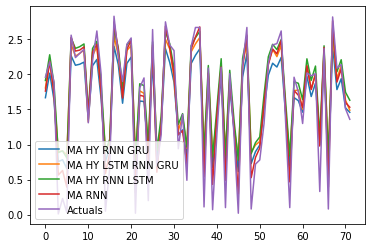

In [413]:
df.plot()

In [414]:
df.to_csv("../prediction/BODmavg.csv", index= False)

## DReg 

In [415]:
mvgdf = metricsdf[metricsdf['Model Category'].str.contains('DReg')]
mvgdf = mvgdf[mvgdf['Metrics'].str.contains('RMSE')]

In [416]:
mvgdf.head()

,Location,Metrics,Model Category,Model,y
120,S1,RMSE,DReg,CNN,11.037774
121,S1,RMSE,DReg,RNN,7.569460
122,S1,RMSE,DReg,GRU,7.000327
123,S1,RMSE,DReg,LSTM,5.302490
124,S1,RMSE,MA DReg,CNN,8.660142


      Location Metrics Model Category         y
Model                                          
CNN         S1    RMSE           DReg  7.333467
GRU         S1    RMSE           DReg  6.683948
LSTM        S1    RMSE           DReg  1.045444
RNN         S1    RMSE           DReg  6.975450


<AxesSubplot:xlabel='Model'>

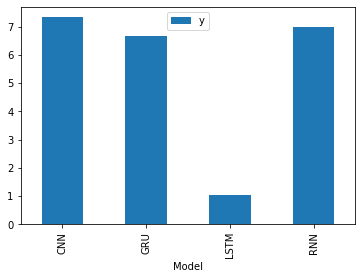

In [417]:
print(mvgdf.groupby(["Model"]).min())
mvgdf.groupby(["Model"]).min().plot(kind= "bar")

### RNN 0.120

3/3 [==============================] - 0s 4ms/step


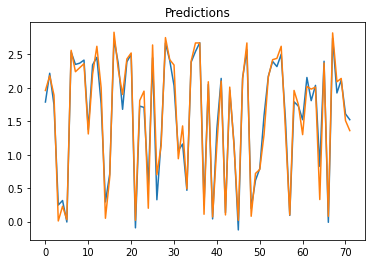

In [418]:
model = load_model(f"epochs{epochs}/auto_rnn/")
rnn = plot_predictions1(model, x_test, y_test)

### LSTM 0.123

3/3 [==============================] - 0s 4ms/step


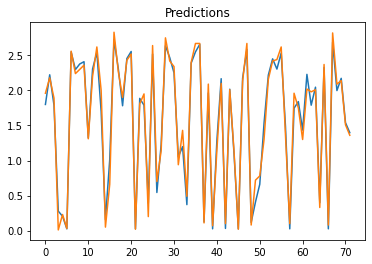

In [419]:
model = load_model(f"epochs{epochs}/auto_lstm/")
lstm = plot_predictions1(model, x_test, y_test)

### GRU 0.125

3/3 [==============================] - 0s 4ms/step


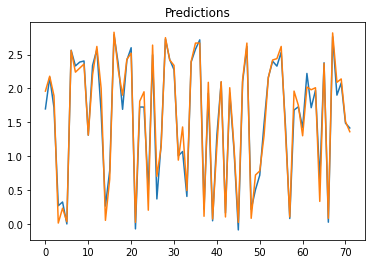

In [420]:
model = load_model(f"epochs{epochs}/auto_gru/")
gru = plot_predictions1(model, x_test, y_test)

In [421]:
df = pd.DataFrame()
df["DReg RNN"] = rnn["Predictions"]
df["Dreg LSTM"] = lstm["Predictions"]
df["Dreg GRU"] = gru["Predictions"]
df["Actuals"] = y_test

<AxesSubplot:>

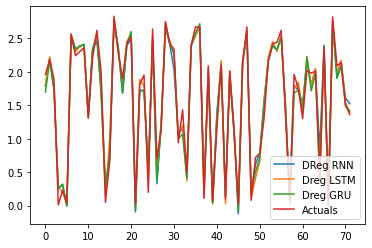

In [422]:
df.plot()

In [423]:
df.to_csv("../prediction/BODdreg.csv", index= False)

## MA DReg 

In [424]:
mvgdf = metricsdf[metricsdf['Model Category'].str.contains('DReg')]
mvgdf = mvgdf[mvgdf['Metrics'].str.contains('RMSE')]
mvgdf = mvgdf[mvgdf['Model Category'].str.contains('MA DReg')]

In [425]:
mvgdf.head()

,Location,Metrics,Model Category,Model,y
124,S1,RMSE,MA DReg,CNN,8.660142
125,S1,RMSE,MA DReg,RNN,8.419531
126,S1,RMSE,MA DReg,GRU,8.068180
127,S1,RMSE,MA DReg,LSTM,6.727088
152,S2,RMSE,MA DReg,CNN,12.942145


      Location Metrics Model Category         y
Model                                          
CNN         S1    RMSE        MA DReg  7.333467
GRU         S1    RMSE        MA DReg  6.721805
LSTM        S1    RMSE        MA DReg  6.727088
RNN         S1    RMSE        MA DReg  7.510601


<AxesSubplot:xlabel='Model'>

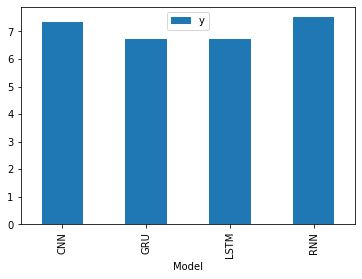

In [426]:
print(mvgdf.groupby(["Model"]).min())
mvgdf.groupby(["Model"]).min().plot(kind= "bar")

### RNN 0.317

3/3 [==============================] - 0s 3ms/step


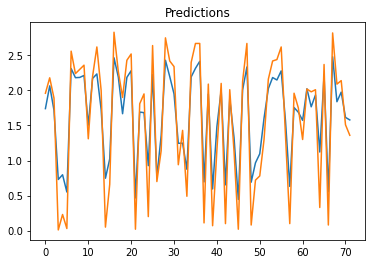

In [427]:
model = load_model(f"epochs{epochs}/mavg_auto_rnn/")
rnn = plot_predictions1(model, x_test, y_test)

### LSTM 0.362

3/3 [==============================] - 0s 4ms/step


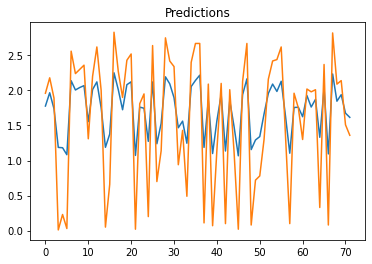

In [428]:
model = load_model(f"epochs{epochs}/mavg_auto_lstm/")
lstm = plot_predictions1(model, x_test, y_test)

### GRU 0.343

3/3 [==============================] - 0s 5ms/step


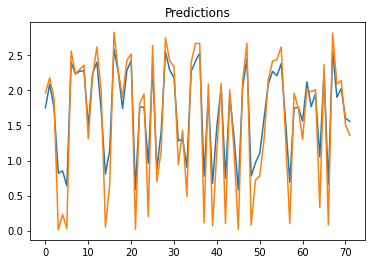

In [429]:
model = load_model(f"epochs{epochs}/mavg_auto_gru/")
gru = plot_predictions1(model, x_test, y_test)

In [430]:
df = pd.DataFrame()
df["MA DReg RNN"] = rnn["Predictions"]
df["MA Dreg LSTM"] = lstm["Predictions"]
df["MA Dreg GRU"] = gru["Predictions"]
df["Actuals"] = y_test

<AxesSubplot:>

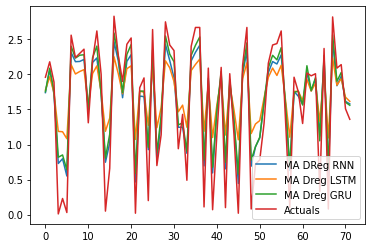

In [431]:
df.plot()

In [432]:
df.to_csv("../prediction/BODmadreg.csv", index= False)

In [433]:
ov = pd.read_csv("../prediction/BODoverall.csv", index_col= False)
mvg = pd.read_csv("../prediction/BODmavg.csv", index_col= False)
dreg = pd.read_csv("../prediction/BODdreg.csv", index_col= False)
mvgdreg = pd.read_csv("../prediction/BODmadreg.csv", index_col= False)

In [434]:
df = pd.concat([ov, mvg, dreg, mvgdreg], axis=1)
df.head()

,RNN GRU P,LSTM RNN GRU P,DReg RNN P,DReg LSTM P,Actuals,MA HY RNN GRU,MA HY LSTM RNN GRU,MA HY RNN LSTM,MA RNN,Actuals,DReg RNN,Dreg LSTM,Dreg GRU,Actuals,MA DReg RNN,MA Dreg LSTM,MA Dreg GRU,Actuals
0,1.800019,1.836245,1.787278,1.799879,1.96,1.667819,1.806827,1.913598,1.761982,1.96,1.787278,1.799879,1.697073,1.96,1.740402,1.777036,1.753821,1.96
1,2.250572,2.265860,2.217100,2.223084,2.18,2.017676,2.187507,2.280387,2.186044,2.18,2.217100,2.223084,2.163390,2.18,2.064652,1.966896,2.089295,2.18
2,1.751291,1.778177,1.745394,1.788059,1.89,1.638591,1.748462,1.866290,1.725067,1.89,1.745394,1.788059,1.715645,1.89,1.716665,1.738759,1.756243,1.89
3,0.278878,0.299746,0.248198,0.277236,0.01,0.756264,0.898676,0.885130,0.564943,0.01,0.248198,0.277236,0.266354,0.01,0.729564,1.187107,0.819116,0.01
4,0.279411,0.287240,0.315275,0.205015,0.23,0.782674,0.906547,0.909843,0.629739,0.23,0.315275,0.205015,0.321420,0.23,0.797135,1.182398,0.851140,0.23


In [435]:
df.columns = ['OV RNN GRU', 'OV LSTM RNN GRU', 'OV DReg RNN', 'OV DReg LSTM', 'Actuals',
       'MA HY RNN GRU', 'MA HY LSTM RNN GRU', 'MA HY RNN LSTM', 'MA RNN',
       'Actuals', 'DReg RNN', 'Dreg LSTM', 'Dreg GRU', 'Actuals',
       'MA DReg RNN', 'MA Dreg LSTM', 'MA Dreg GRU', 'Actuals']

In [436]:
df = df.drop(columns= "Actuals")
df.head()

,OV RNN GRU,OV LSTM RNN GRU,OV DReg RNN,OV DReg LSTM,MA HY RNN GRU,MA HY LSTM RNN GRU,MA HY RNN LSTM,MA RNN,DReg RNN,Dreg LSTM,Dreg GRU,MA DReg RNN,MA Dreg LSTM,MA Dreg GRU
0,1.800019,1.836245,1.787278,1.799879,1.667819,1.806827,1.913598,1.761982,1.787278,1.799879,1.697073,1.740402,1.777036,1.753821
1,2.250572,2.265860,2.217100,2.223084,2.017676,2.187507,2.280387,2.186044,2.217100,2.223084,2.163390,2.064652,1.966896,2.089295
2,1.751291,1.778177,1.745394,1.788059,1.638591,1.748462,1.866290,1.725067,1.745394,1.788059,1.715645,1.716665,1.738759,1.756243
3,0.278878,0.299746,0.248198,0.277236,0.756264,0.898676,0.885130,0.564943,0.248198,0.277236,0.266354,0.729564,1.187107,0.819116
4,0.279411,0.287240,0.315275,0.205015,0.782674,0.906547,0.909843,0.629739,0.315275,0.205015,0.321420,0.797135,1.182398,0.851140


In [437]:
df["Actuals"] = ov["Actuals"]

In [438]:
df.to_csv("../prediction/BODBest.csv")

             Location Metrics Model Category          y
Model                                                  
CNN                S4    RMSE        MA DReg  33.265293
CNN GRU            S4    RMSE          MA HY  16.171174
CNN LSTM           S4    RMSE          MA HY  15.654485
CNN RNN GRU        S4    RMSE          MA HY   5.503417
GRU                S4    RMSE        MA DReg  31.289494
LSTM               S4    RMSE        MA DReg  30.908347
LSTM RNN GRU       S4    RMSE          MA HY   8.040255
RNN                S4    RMSE        MA DReg   8.419531
RNN GRU            S4    RMSE          MA HY  15.692272
RNN LSTM           S4    RMSE          MA HY  15.888250


<AxesSubplot:xlabel='Model'>

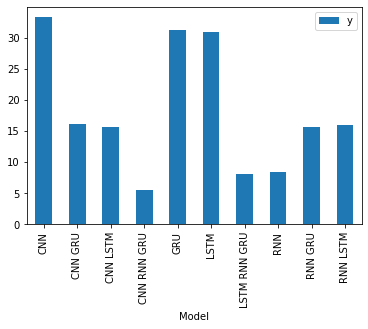

In [294]:
print(rmse.groupby(["Model"]).max())
rmse.groupby(["Model"]).max().plot(kind= "bar")